Generate movies and users


In [48]:
import numpy as np
import pandas as pd
import random
import faker
from itertools import product

num_viewers = 1000
num_films = 100

sci_fi_name_1 = ["evil", "metalic", "cosmic", "blood thirsty", "galactic", "mutant"]
sci_fi_name_2 = ["droid", "zombie", "space zebra"]
sci_fi_name_3 = ["from outer space", "invasion", "attack on Mars"]

action_name_1 = ["ultimate", "bad", "fatal", "unstoppable", "crucial", "loaded"]
action_name_2 = ["weapon", "cop", "tough guy"]
action_name_3 = ["in the line of fire", "death wish", "mission"]
period_drama_name_1 = [
    "pride",
    "obstinacy",
    "indolence",
    "luxury",
    "sense",
    "sensibility",
]
period_drama_name_2 = ["and", "in", "over"]
period_drama_name_3 = ["prejudice", "paradise", "ecstacy"]
sequel = ["", "V", "II", "III", "IV"]

# Randomly select number of films for each genre
num_action = random.randint(0, num_films)
num_sci_fi = random.randint(0, num_films - num_action)
num_period_drama = num_films - num_action - num_sci_fi

# Generate all possible permutations for sci-fi
all_sci_fi_permutations = list(
    product(sci_fi_name_1, sci_fi_name_2, sci_fi_name_3, sequel)
)

# Randomly select sci-fi films
sci_fi_films = random.sample(all_sci_fi_permutations, num_sci_fi)
sci_fi_films = [" ".join(movie) for movie in sci_fi_films]

# Generate all possible permutations for period drama
all_period_drama_permutations = list(
    product(period_drama_name_1, period_drama_name_2, period_drama_name_3, sequel)
)

# Randomly select period drama films
period_drama_films = random.sample(all_period_drama_permutations, num_period_drama)
period_drama_films = [" ".join(movie) for movie in period_drama_films]

# Generate all possible permutations for action films
all_action_permutations = list(
    product(action_name_1, action_name_2, action_name_3, sequel)
)

# Randomly select action films
action_films = random.sample(all_action_permutations, num_action)
action_films = [" ".join(movie) for movie in action_films]


movie_titles = sci_fi_films + period_drama_films + action_films

# Create a dataframe of movies with their genres and reputation scores
movies = pd.DataFrame(
    {
        "movie": movie_titles,
        "genre": ["sci-fi"] * num_sci_fi + ["period drama"] * num_period_drama + ["action"] * num_action,
    }
)


In [67]:
d = [1]*num_films
s = [1]*num_sci_fi + [0]*num_period_drama + [0]*num_action
p = [0]*num_sci_fi + [1]*num_period_drama + [0]*num_action
a = [0]*num_sci_fi + [0]*num_period_drama + [1]*num_action
q = [random.randint(1, 10)/10 for i in range(num_films)]

# Create an array of viewers with their preferences

movies = np.array([d, s, p, a, q])
#movies = movies.T
movies.shape


(5, 100)

In [77]:
mean = np.array([2, 3, 1])
cov = np.array([[1, 0.8, 0.1], [0.8, 1, 0.3], [0.1, 0.3, 1]])

# Generate the sample
genre_linear = np.random.multivariate_normal(mean, cov, num_viewers).T

# Sample from the normal distribution
alphas = np.random.normal(-5, 1, num_viewers)
qual_response = np.random.normal(0, 1, num_viewers)

# Add the quality response to the genre response as an extra column
users = np.vstack((alphas, genre_linear, qual_response)).T

users.shape



(1000, 5)

In [78]:
# Do matrix multiplication to get the ratings
linear_watch = np.dot(users, movies)
linear_watch.shape

# Apply the logistic function to get the probability of watching
watch_prob = 1/(1 + np.exp(-linear_watch))
watch_prob.shape

(1000, 100)

In [82]:
res = pd.DataFrame(watch_prob)
res.columns = movie_titles

# Add names as row indexes using faker
fake = faker.Faker()
names = [fake.name() for i in range(num_viewers)]
res.index = names

res

,galactic droid attack on Mars V,metalic space zebra invasion IV,mutant droid attack on Mars,cosmic zombie invasion III,cosmic space zebra invasion IV,evil droid from outer space V,metalic space zebra attack on Mars III,blood thirsty droid from outer space,evil space zebra invasion III,blood thirsty zombie invasion III,...,loaded tough guy in the line of fire V,crucial tough guy mission,fatal cop mission IV,fatal tough guy death wish,fatal tough guy in the line of fire II,bad cop mission IV,crucial tough guy in the line of fire II,crucial weapon mission V,fatal tough guy mission V,bad tough guy death wish IV
Thomas Hancock,0.150588,0.135967,0.161037,0.135967,0.118352,0.161037,0.118352,0.155741,0.150588,0.140703,...,0.203781,0.210304,0.223805,0.223805,0.167811,0.179203,0.216979,0.197410,0.210304,0.185122
Micheal Ellison,0.107970,0.140497,0.090137,0.140497,0.196151,0.090137,0.196151,0.098695,0.107970,0.128832,...,0.009653,0.008741,0.007165,0.007165,0.017466,0.014341,0.007914,0.010659,0.008741,0.012992
Joe Goodman,0.100962,0.062586,0.137060,0.062586,0.032299,0.137060,0.032299,0.117818,0.100962,0.073560,...,0.038853,0.045869,0.063664,0.063664,0.014087,0.019808,0.054080,0.032873,0.045869,0.023469
Tricia Taylor,0.063242,0.058492,0.066606,0.058492,0.052677,0.066606,0.052677,0.064904,0.063242,0.060037,...,0.012197,0.012536,0.013241,0.013241,0.010348,0.010931,0.012883,0.011868,0.012536,0.011235
Kevin Blanchard,0.032367,0.028991,0.034825,0.028991,0.025017,0.034825,0.025017,0.033574,0.032367,0.030077,...,0.006861,0.007124,0.007681,0.007681,0.005474,0.005902,0.007397,0.006608,0.007124,0.006129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Loretta Green,0.014961,0.021843,0.011610,0.021843,0.035990,0.011610,0.035990,0.013181,0.014961,0.019260,...,0.003147,0.002768,0.002142,0.002142,0.006777,0.005250,0.002435,0.003577,0.002768,0.004620
Victor Hubbard,0.037941,0.041370,0.035808,0.041370,0.046406,0.035808,0.046406,0.036859,0.037941,0.040195,...,0.090131,0.087698,0.083009,0.083009,0.106042,0.100481,0.085324,0.092624,0.087698,0.097798
Jacob Garcia,0.072391,0.076810,0.069576,0.076810,0.083086,0.069576,0.083086,0.070971,0.072391,0.075310,...,0.010383,0.010166,0.009746,0.009746,0.011785,0.011298,0.009954,0.010605,0.010166,0.011062
Daniel Thomas,0.105804,0.063418,0.146511,0.063418,0.031168,0.146511,0.031168,0.124740,0.105804,0.075408,...,0.019095,0.022910,0.032898,0.032898,0.006335,0.009164,0.027466,0.015905,0.022910,0.011017


In [83]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.5 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 8.1 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


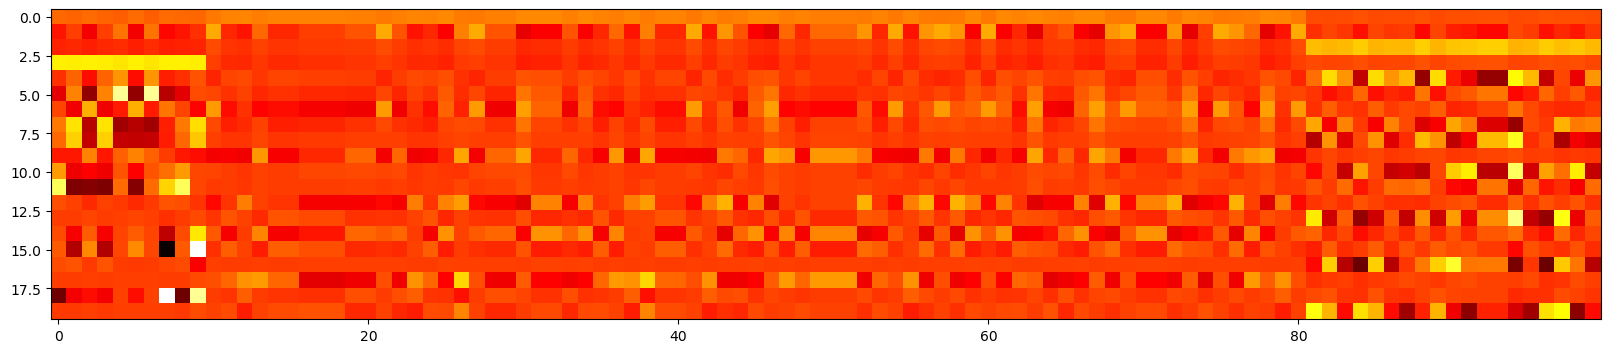

In [91]:
# Do a PCA on the data
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(watch_prob)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component ' + str(i) for i in range(1, 21)])
principalDf.index = names



# Do a heatmap of the loadings
loadings = pca.components_
loadings.shape

# Change figure size
plt.figure(figsize=(20, 10))

plt.imshow(loadings, cmap='hot', interpolation='nearest')
plt.show()





# Scratch

(array([0.94483429, 1.29477291, 1.92466243, 1.99465016, 1.88966857,
        1.99465016, 2.69452741, 2.09963175, 2.55455196, 2.27460106,
        1.99465016, 1.92466243, 2.16961947, 1.3997545 , 1.08480974,
        1.43474836, 1.18979132, 0.97982815, 0.69987725, 0.52490794,
        0.41992635, 0.31494476, 0.52490794, 0.31494476, 0.06998772,
        0.17496931, 0.        , 0.03499386, 0.03499386, 0.03499386]),
 array([0.01130324, 0.03987968, 0.06845612, 0.09703256, 0.125609  ,
        0.15418544, 0.18276188, 0.21133832, 0.23991475, 0.26849119,
        0.29706763, 0.32564407, 0.35422051, 0.38279695, 0.41137339,
        0.43994983, 0.46852627, 0.49710271, 0.52567915, 0.55425559,
        0.58283203, 0.61140847, 0.63998491, 0.66856135, 0.69713779,
        0.72571423, 0.75429067, 0.78286711, 0.81144355, 0.84001999,
        0.86859643]),
 <BarContainer object of 30 artists>)

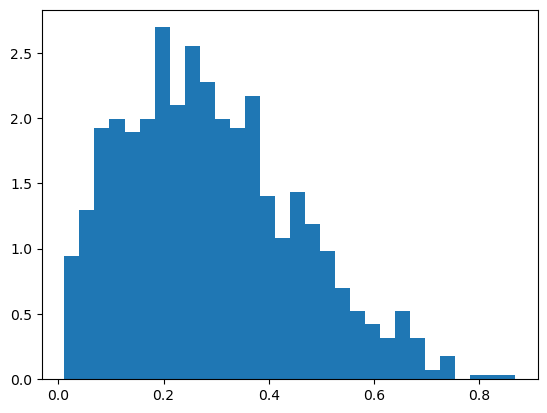

In [1]:
# Draw a sample from a beta distribution
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 2
b = 5
n = 1000

# Generate the sample
sample = np.random.beta(a, b, n)

# Plot the histogram
plt.hist(sample, bins=30, density=True)

(0.0, 1.0)

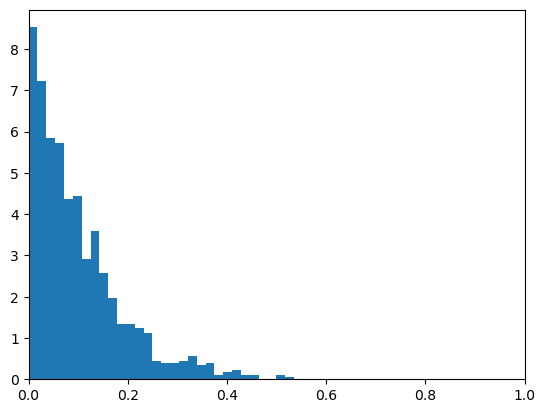

In [16]:
# Draw a sample from a beta distribution
import numpy as np
import matplotlib.pyplot as plt

theta = 0.1
lambda_sym = 10
alpha = theta * lambda_sym
beta = (1 - theta) * lambda_sym

# Generate the sample
sample = np.random.beta(alpha, beta, n)

# Plot the histogram
plt.hist(sample, bins=30, density=True)

# Set the x lims to be between 0 and 1
plt.xlim(0, 1)

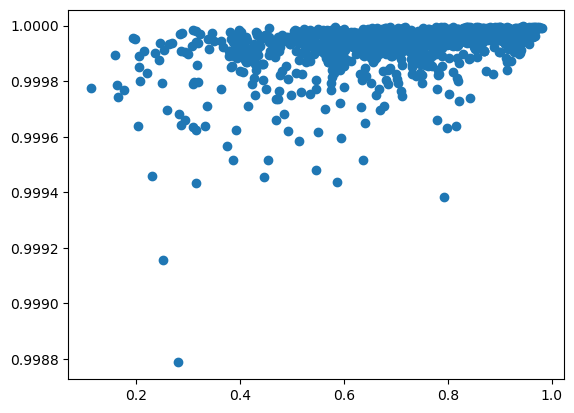

In [20]:
import matplotlib.pyplot as plt

# Parameters
n = 1000
mean = np.array([1, 10])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generate the sample
sample = np.random.multivariate_normal(mean, cov, n)

# Transform the sample
sample = 1 / (1 + np.exp(-sample))

# Plot the sample
plt.scatter(sample[:, 0], sample[:, 1])


In [33]:
# Parameters
n = 1000
mean = np.array([0.0001, 3, 1])
cov = np.array([[1, 0.5, 0.1], [0.8, 1, 0.3], [0.1, 0.3, 1]])

# Generate the sample
genre_linear = np.random.multivariate_normal(mean, cov, n)

# Transform the sample
genre_probabilities = 1 / (1 + np.exp(-genre_linear))


genre_probabilities

/var/folders/bz/3sy005891y52rw2n4xvglzgr0000gn/T/ipykernel_98024/776005560.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  genre_linear = np.random.multivariate_normal(mean, cov, n)


array([[0.35896321, 0.95641255, 0.88290075],
       [0.26032195, 0.94064676, 0.71336356],
       [0.60553264, 0.92590648, 0.89192686],
       ...,
       [0.4803575 , 0.96537589, 0.6315771 ],
       [0.40904116, 0.97144878, 0.83221511],
       [0.64209502, 0.98345068, 0.71078585]])

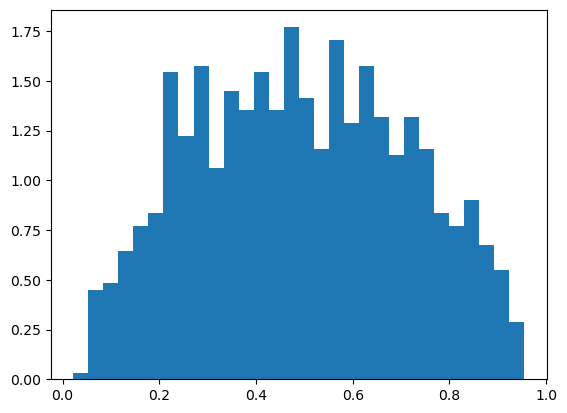

In [34]:
# plot a histogram of the first genre
_ = plt.hist(genre_probabilities[:, 0], bins=30, density=True)

What is the probability that Simon watched this film - I'm going to tell you that it is sci fi

This is the conditional probability that i watched j given that j is genre k

This is just i's personal probability for genre k - which could be modelled as a beta distribution



What is the probability that Simon watched this film - I'm going to tell you that it is sci fi and it is good
